In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from mlresearch.utils import set_matplotlib_style
from algorec.environments import BankLoanApplication
from algorec.populations import BasePopulation
from algorec.recourse import NFeatureRecourse

set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
# TODO: K -> number of people or an array for each time step
THRESHOLD = 0.8
ADAPTATION = 0.2
# TODO: Fixed number (absolute) or an array for each time step
GROWTH_RATE = 1

# NOTE: use the following parameters to audit a bug in favorable y's
# The bug is either in the visualizations, or the success_rate function
# THRESHOLD = 0.99
# ADAPTATION = 0.01
# GROWTH_RATE = 1.1

In [3]:
# Generate data and fit regression
continuous = [f"f_{i}" for i in range(N_CONTINUOUS)]
categorical = [f"cat_{i}" for i in range(N_CAT)]
rng = np.random.default_rng(RNG_SEED)
df = pd.DataFrame(
    rng.random((N_AGENTS, N_CONTINUOUS)),
    columns=[f"f_{i}" for i in range(N_CONTINUOUS)],
)
for i in range(N_CAT):
    df[f"cat_{i}"] = rng.integers(0, 2, N_AGENTS)
y = rng.integers(0, 2, N_AGENTS)
lr = LogisticRegression().fit(df, y)

(array([ 4.,  5., 12., 14., 20., 10., 13., 11.,  8.,  3.]),
 array([0.37874517, 0.40511149, 0.43147781, 0.45784413, 0.48421045,
        0.51057677, 0.53694309, 0.56330941, 0.58967573, 0.61604205,
        0.64240837]),
 <BarContainer object of 10 artists>)

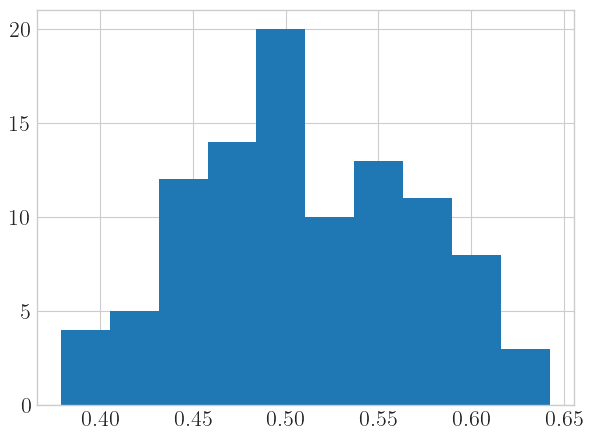

In [4]:
plt.hist(lr.predict_proba(df)[:, -1])

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Population scores over 21 time steps'}, xlabel='Step', ylabel='Score'>)

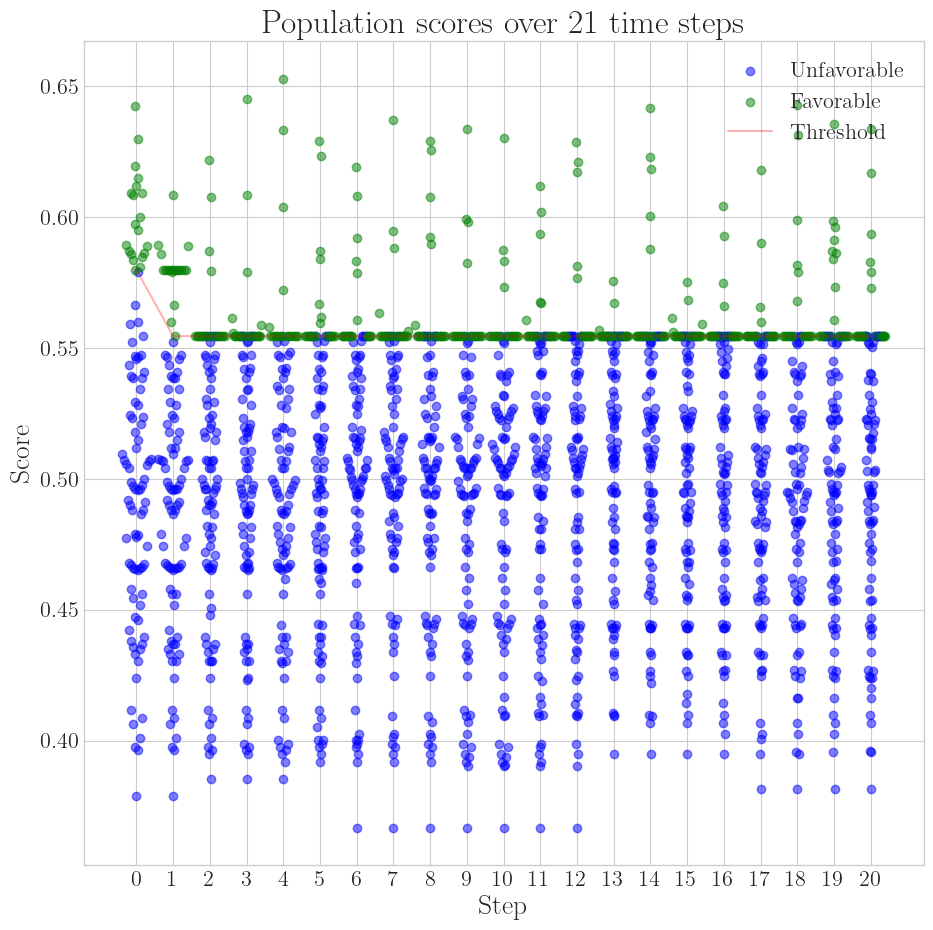

In [5]:
# Define the necessary components to run simulation
population = BasePopulation(df, categorical=categorical)
recourse = NFeatureRecourse(lr, n_features=2)
environment = BankLoanApplication(
    population,
    recourse,
    threshold=THRESHOLD,
    adaptation=ADAPTATION,
    growth_rate=GROWTH_RATE,
    random_state=RNG_SEED,
)

environment.run_simulation(20)

environment.plot.agent_scores()

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Population at t=4'}, xlabel='f_0', ylabel='f_1'>)

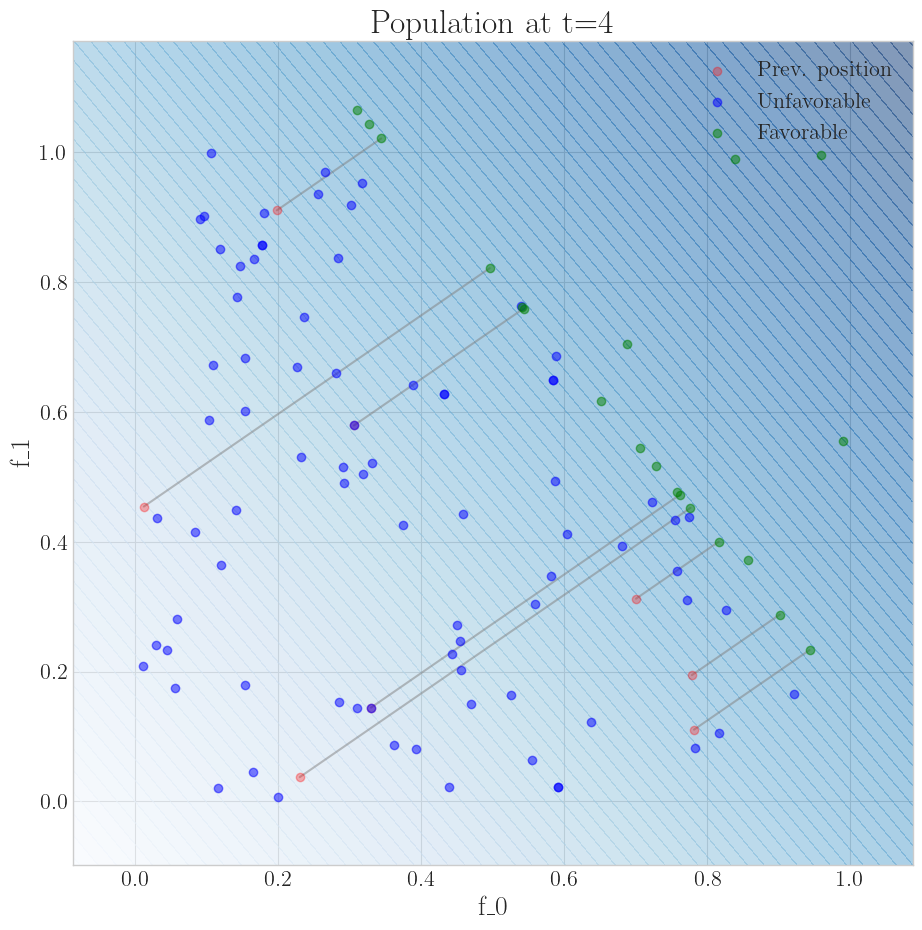

In [6]:
# environment.plot.scatter(1)
environment.plot.scatter(4)

# Additional Features

In [7]:
# A simple performance metric
environment.success_rate(1, 11)

array([1.        , 0.72727273, 0.75      , 1.        , 0.72222222,
       0.84615385, 0.8125    , 0.6875    , 0.90909091, 0.93333333])

(array([ 4.,  5., 12., 14., 20., 10., 13., 11.,  8.,  3.]),
 array([0.37874517, 0.40511149, 0.43147781, 0.45784413, 0.48421045,
        0.51057677, 0.53694309, 0.56330941, 0.58967573, 0.61604205,
        0.64240837]),
 <BarContainer object of 10 artists>)

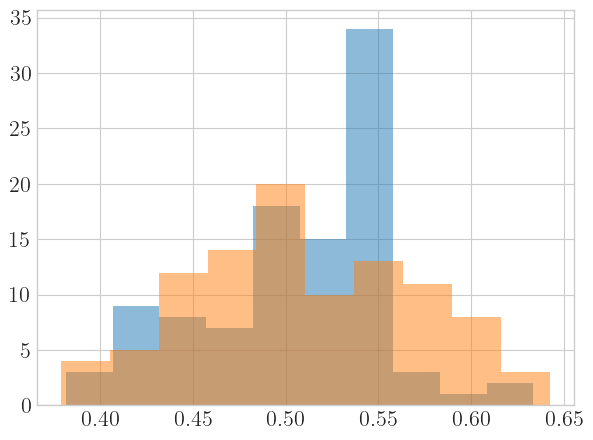

In [17]:
# Histogram with score distribution
environment.plot.scores_histogram(alpha=0.5)
environment.plot.scores_histogram(0, alpha=0.5)

<Axes: ylabel='Density'>

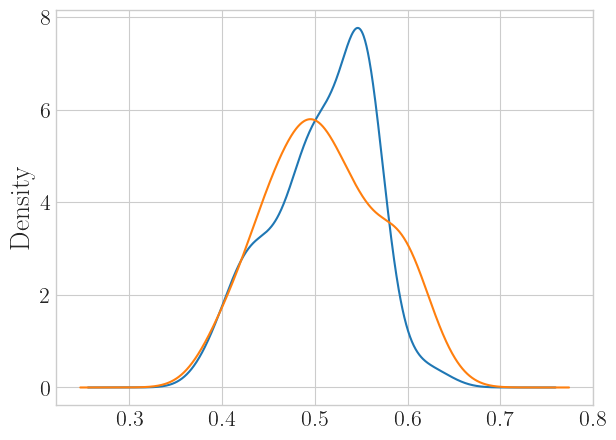

In [20]:
# KDE with score distribution
environment.plot.scores_kde()
environment.plot.scores_kde(0)